In [3]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist
from scipy.stats import mode
from sklearn.model_selection import train_test_split

# KNN
In this exercise we will implement the KNN algorithm. We will start with some data, generated using the `make_blobs` function from scikit learn. Read the documentation to learn how to influence the dataset generation procedure. 

Next, we will save a portion of the data for testing using scikit learn's `train_test_split` function. 

Text(0, 0.5, '$x_2$')

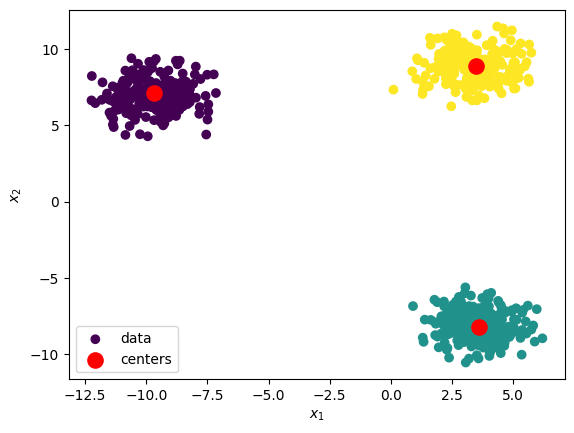

In [65]:
X,y,centers = make_blobs(
    n_samples=1000,
    n_features=2,
    return_centers=True,
    centers = 3
)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=True)


# Plot the training data
plt.scatter(X_train[:,0], X_train[:,1], c=y_train)

plt.scatter(centers[:,0], centers[:,1], c='r', s=120)
plt.legend(["data", "centers"])
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

Next, let us create a KNN class. We can then implement the following:
### Constructor
`__init__` method, which will take as argument `K` (the number of neighbors to use) and store it as a property of the class.
### Fit
Fit method should simply store the training data X and y as properties.
### Predict
Predict function should take the input data and return the predicted labels.
Moreover, we would like to:
1. Check if the model has been already fitted
2. Calculate the squared euclidean distance between each point in X and each point in obj.X
3. Find the K nearest neighbors for each point in X, and return the most common label among them


## Hints
Have a look at the `cdist` function from `scipy.spatial.distance`. 

In [66]:
class KNN:
    def __init__(self, K):
        self.K = K
        self.X_train = None
        self.y_train = None
    def fit(self,X, y):
        self.X_train = X
        self.y_train = y

    def predict(self,X):
        if self.X_train is None:
            raise("Not fitted")
        else:
            distances = cdist(X, X_train, metric='euclidean')  # shape: (n_test, n_train)
            neighbors_idx = np.argsort(distances, axis=1)[:, :self.K]
            
            preds = []
            for point in neighbors_idx: #point gibt also die Indizees der drei nächsten Punkte an
                neighbor_labels = self.y_train[point]
                most_frequent = np.argmax(np.bincount(neighbor_labels))
                preds.append(most_frequent)

        return np.array(preds)


Now, we can instantiate a `KNN` object and fit it to the training data. Then, predict the labels of the test data and plot the results.

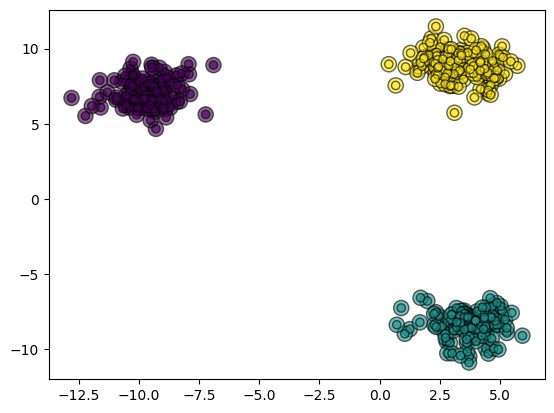

In [67]:
KNN_model = KNN(K=3)
KNN_model.fit(X = X_train, y= y_train)
preds = KNN_model.predict(X_test)

plt.scatter(X_test[:,0], X_test[:,1], c=y_test, s=120, edgecolors='k', alpha=0.6)
plt.scatter(X_test[:,0], X_test[:,1], c=preds, edgecolors='k', alpha=.6)

## Decision boundary
In order to investigate where the decision boundary is, we can create a `meshgrid` of points in the two dimensional input space. Then, we can simply call the `predict` method for each point. The output can be reshaped to a a grid and plotted using `countourf`.

[[-10.89564978 -10.89564978 -10.89564978 ... -10.89564978 -10.89564978
  -10.89564978]
 [-10.43905871 -10.43905871 -10.43905871 ... -10.43905871 -10.43905871
  -10.43905871]
 [ -9.98246764  -9.98246764  -9.98246764 ...  -9.98246764  -9.98246764
   -9.98246764]
 ...
 [ 10.5641305   10.5641305   10.5641305  ...  10.5641305   10.5641305
   10.5641305 ]
 [ 11.02072156  11.02072156  11.02072156 ...  11.02072156  11.02072156
   11.02072156]
 [ 11.47731263  11.47731263  11.47731263 ...  11.47731263  11.47731263
   11.47731263]]


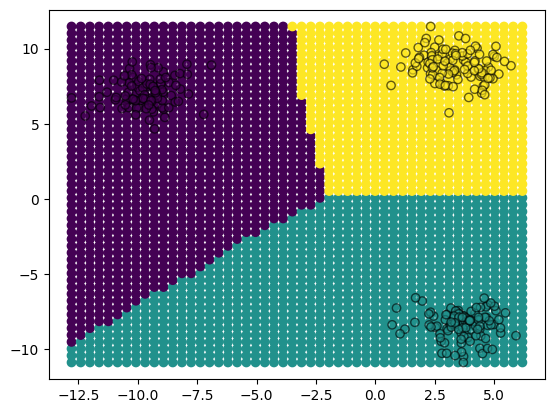

In [ ]:
res = 50
grid_x = np.linspace(X[:,0].min(), X[:,0].max(), res)
grid_y = np.linspace(X[:,1].min(), X[:,1].max(), res)
xx,yy = np.meshgrid(grid_x,grid_y)


pred_grid = []
grid_points = []
for i in xx[0]:
    for j in yy[:, 0]:
        grid_point = np.array([i,j]).reshape(1, -1)
        pred_grid.append(KNN_model.predict(grid_point))
        grid_points.append([i,j])

grid_points = np.array(grid_points)
plt.scatter(grid_points[:,0], grid_points[:,1], c=pred_grid)
plt.scatter(X_test[:,0], X_test[:,1], c=preds, edgecolors='k', alpha=.6)